In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing


In [102]:
cl = pd.read_csv("caratlane.csv")
cl.drop(['Unnamed: 0', 'lwd'], axis=1, inplace=True)
display(cl.head(3))

,carat,cut,color,clarity,depth,table,price
0,0.20,Premium,J,VS1,62.4,58,"Rs. 18,115"
1,0.21,Premium,J,VVS2,59.3,62,"Rs. 19,444"
2,0.20,Premium,J,IF,61.5,59,"Rs. 20,979"


In [103]:
cl.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [104]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
carat      206 non-null float64
cut        206 non-null object
color      206 non-null object
clarity    206 non-null object
depth      206 non-null float64
table      206 non-null int64
price      206 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 11.4+ KB


In [105]:
priceint=pd.DataFrame(cl['price'].replace('[Rs.,]', '', regex=True))
cl.drop(['price'], axis=1, inplace=True)
cl['price'] = priceint['price'].values
cl.head()

,carat,cut,color,clarity,depth,table,price
0,0.20,Premium,J,VS1,62.4,58,18115
1,0.21,Premium,J,VVS2,59.3,62,19444
2,0.20,Premium,J,IF,61.5,59,20979
3,0.20,Premium,J,IF,59.3,60,21212
4,0.23,Premium,J,VVS1,59.7,61,21979


In [106]:
cl.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [107]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
carat      206 non-null float64
cut        206 non-null object
color      206 non-null object
clarity    206 non-null object
depth      206 non-null float64
table      206 non-null int64
price      206 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 11.4+ KB


In [108]:
print('Percent of non-numeric data in Price -->', len([x for x in cl['price'] if not x.isnumeric()]) / len(cl['price'])*100)


Percent of non-numeric data in Price --> 100.0


In [109]:
import nbimporter
from diamond_all import removenotnum, histplot, sorteddf, dfboxplot, removeoutliers, convert_catg, convertfeatures2log

In [110]:
notnumtable = removenotnum(cl['price'])
print('all rubish values -->', set(notnumtable))
print('Percent of identified rubbish data in Table -->', len(notnumtable) / len(cl['price'])*100)


all rubish values --> set()
Percent of identified rubbish data in Table --> 0.0


In [111]:
cl['price'] = cl['price'].astype(float)
cl['table'] = cl['table'].astype(float)

In [112]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
carat      206 non-null float64
cut        206 non-null object
color      206 non-null object
clarity    206 non-null object
depth      206 non-null float64
table      206 non-null float64
price      206 non-null float64
dtypes: float64(4), object(3)
memory usage: 11.4+ KB


In [113]:
print("Cut: ",set(cl["cut"]))
print("Color: ",set(cl["color"]))
print("Clarity: ",set(cl["clarity"]))

Cut:  {'Premium', 'Very Good'}
Color:  {'J', 'G', 'E', 'F', 'H', 'I', 'D'}
Clarity:  {'SI2', 'VS1', 'VVS2', 'SI1', 'VS2', 'VVS1', 'IF'}


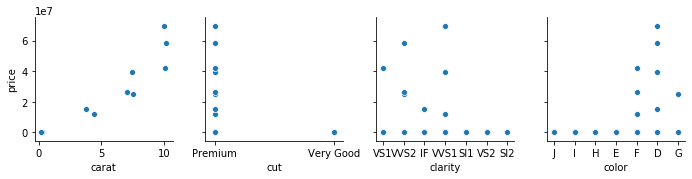

In [114]:
sns.pairplot(cl, x_vars=['carat', 'cut', 'clarity', 'color'], y_vars = ['price'])
plt.show()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']

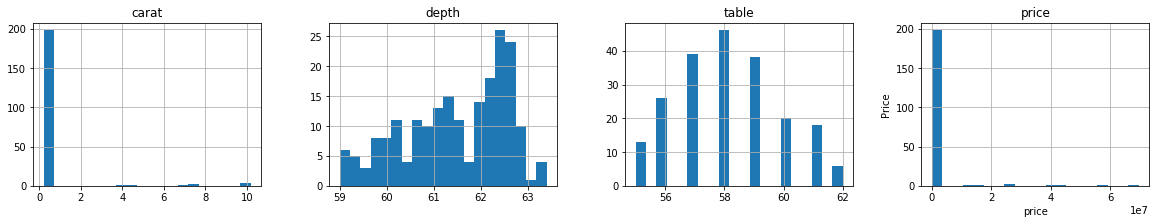

In [115]:
linear_vars_ps = cl.select_dtypes(include=[np.number]).columns
display(list(cl))
histplot(cl,linear_vars_ps)

In [116]:
sorteddf(cl, linear_vars_ps)

'sorted by carat --> [10.18, 10.07, 10.04, 7.51, 7.45]'

'sorted by depth --> [63.4, 63.4, 63.3, 63.2, 63.0]'

'sorted by table --> [62.0, 62.0, 62.0, 62.0, 62.0]'

'sorted by price --> [69615625.0, 58478870.0, 42122295.0, 39180382.0, 26132754.0]'

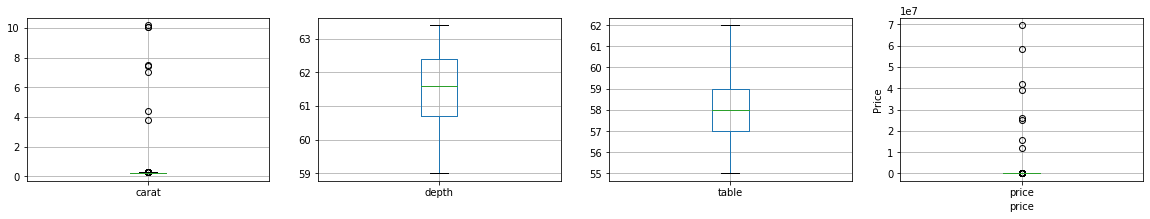

In [117]:
dfboxplot(cl, linear_vars_ps)

In [118]:
removeoutliers(cl,linear_vars_ps, 3)

,carat,cut,color,clarity,depth,table,price
0,0.20,Premium,J,VS1,62.4,58.0,18115.0
1,0.21,Premium,J,VVS2,59.3,62.0,19444.0
2,0.20,Premium,J,IF,61.5,59.0,20979.0
3,0.20,Premium,J,IF,59.3,60.0,21212.0
4,0.23,Premium,J,VVS1,59.7,61.0,21979.0
...,...,...,...,...,...,...,...
201,0.30,Premium,J,SI1,61.4,57.0,27936.0
202,0.20,Premium,F,VVS2,62.3,58.0,27936.0
203,0.22,Premium,I,VVS2,60.7,61.0,27976.0
204,0.23,Premium,J,VVS1,62.2,58.0,28053.0


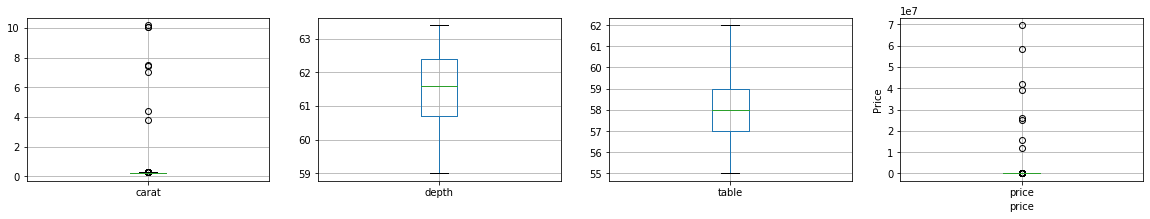

In [119]:
dfboxplot(cl, linear_vars_ps)

In [120]:
cl.sort_values(by="carat", ascending=False).head(10)

,carat,cut,color,clarity,depth,table,price
16,10.18,Premium,D,VVS2,60.2,58.0,58478870.0
15,10.07,Premium,F,VS1,62.6,58.0,42122295.0
17,10.04,Premium,D,VVS1,62.7,55.0,69615625.0
12,7.51,Premium,G,VVS2,59.0,60.0,25221414.0
14,7.45,Premium,D,VVS1,61.2,57.0,39180382.0
13,7.05,Premium,F,VVS2,61.9,57.0,26132754.0
10,4.40,Premium,F,VVS1,62.0,58.0,12050390.0
11,3.80,Premium,D,IF,60.7,59.0,15537610.0
121,0.32,Premium,J,SI2,61.2,57.0,26880.0
136,0.31,Premium,J,SI2,62.0,57.0,27158.0


In [121]:
cltrim = cl[cl['carat']<1]
cltrim.sort_values(by="carat", ascending=False).head(3)

,carat,cut,color,clarity,depth,table,price
121,0.32,Premium,J,SI2,61.2,57.0,26880.0
70,0.31,Premium,J,SI2,62.1,55.0,25777.0
136,0.31,Premium,J,SI2,62.0,57.0,27158.0


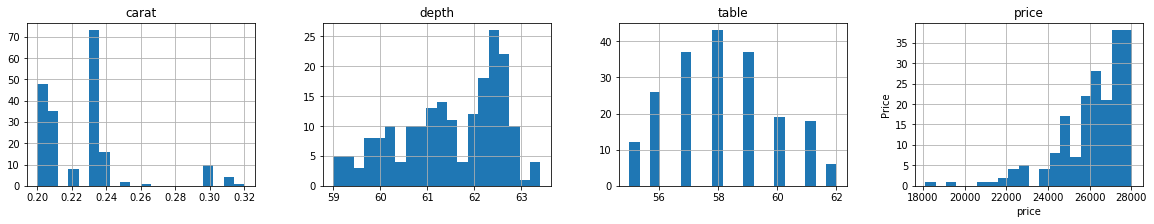

In [122]:
histplot(cltrim,linear_vars)

In [123]:
linear_vars = cltrim.select_dtypes(include=[np.number]).columns
display(list(linear_vars))
convertfeatures2log(cltrim,linear_vars)
cltrim.head(3)

['carat', 'depth', 'table', 'price']

diamond_all.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cell_type": "markdown",


,carat,cut,color,clarity,depth,table,price
0,-1.609438,Premium,J,VS1,4.133565,4.060443,9.804496
1,-1.560648,Premium,J,VVS2,4.082609,4.127134,9.875294
2,-1.609438,Premium,J,IF,4.119037,4.077537,9.951277


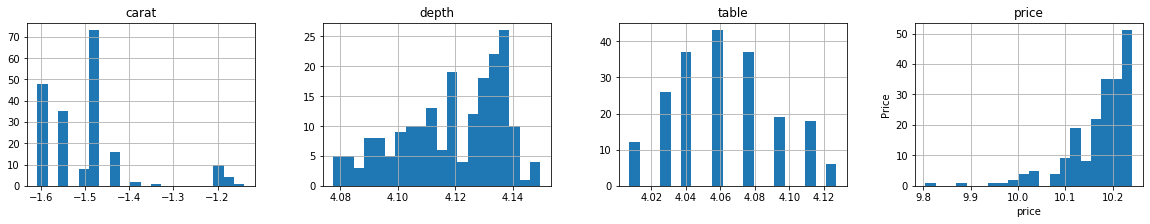

In [124]:
histplot(cltrim,linear_vars)

In [125]:
X = cltrim.drop(['price'], axis=1)
X.head(3)

,carat,cut,color,clarity,depth,table
0,-1.609438,Premium,J,VS1,4.133565,4.060443
1,-1.560648,Premium,J,VVS2,4.082609,4.127134
2,-1.609438,Premium,J,IF,4.119037,4.077537


In [126]:
y = cltrim[['price']]
y.head(3)

,price
0,9.804496
1,9.875294
2,9.951277


In [127]:
convert_catg(X)
X.head(3)

,carat,cut,color,clarity,depth,table
0,-1.609438,0,6,3,4.133565,4.060443
1,-1.560648,0,6,6,4.082609,4.127134
2,-1.609438,0,6,0,4.119037,4.077537


# Load diam_proc.csv data for ML model training

In [128]:
df = pd.read_csv("diam_proc.csv")
df.drop(['Unnamed: 0', 'l', 'w', 'd'], axis=1, inplace=True)
display(df.head(3))

X_df = df.drop(['price'], axis=1)
display(X_df.head(3))

y_df = df[['price']] # two [[ to create a DF. Single [] will create a series / array
display(y_df.head(3))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)
X_train.head(2)

,carat,cut,color,clarity,depth,table,price
0,-1.427116,2,1,3,4.119200,4.007515,5.926686
1,-1.514128,3,1,2,4.091173,4.111038,5.926686
2,-1.427116,1,1,4,4.041471,4.174541,5.929749


,carat,cut,color,clarity,depth,table
0,-1.427116,2,1,3,4.119200,4.007515
1,-1.514128,3,1,2,4.091173,4.111038
2,-1.427116,1,1,4,4.041471,4.174541


,price
0,5.926686
1,5.926686
2,5.929749


,carat,cut,color,clarity,depth,table
3096,0.029559,2,3,0,4.119200,4.02553
39580,-0.653926,1,2,2,4.152771,4.02553


In [129]:
from sklearn.neighbors import KNeighborsRegressor

reg_all = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)
y_pred[0:3]


array([[8.00704336],
       [8.2916448 ],
       [8.23012118]])

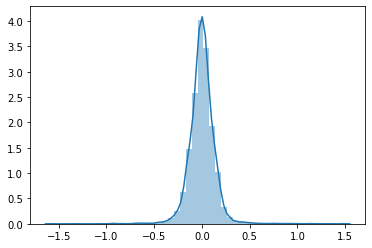

In [130]:
sns.distplot(y_test-y_pred,bins=50)

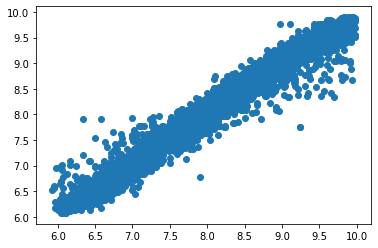

In [131]:
plt.scatter(y_test,y_pred)

In [132]:
from sklearn import metrics

# The following are 

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0918312366882638
MSE: 0.017961877624326664
RMSE: 0.1340219296396178


# Run ML model for caratlane data

In [135]:
from sklearn.model_selection import train_test_split
Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(Xcl_train.head(2))
display(ycl_train.head(2))

,carat,cut,color,clarity,depth,table
59,-1.469676,0,1,1,4.133565,4.060443
176,-1.469676,1,6,5,4.141546,4.077537


,price
59,10.151831
176,10.231351


In [156]:
from sklearn.neighbors import KNeighborsRegressor

regcl = KNeighborsRegressor(n_neighbors = 3, metric = 'minkowski', p = 2)
regcl.fit(Xcl_train,ycl_train)
y_predcl=regcl.predict(Xcl_test)
y_predcl[0:3]

array([[10.1544671 ],
       [10.19265274],
       [10.13839745]])

In [194]:
y_predclexp = np.exp(y_predcl)
ycl_testexp = np.exp(ycl_test)
difflist = ycl_testexp-y_predclexp
difflist.sort_values(by="price").head()

,price
5,-3337.600677
23,-2865.642702
38,-2451.727964
37,-2318.384784
26,-2301.802955


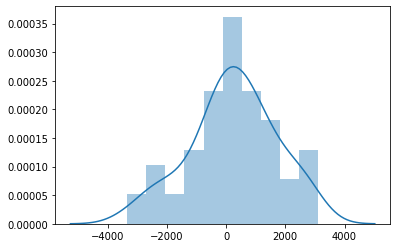

In [176]:
sns.distplot(ycl_testexp-y_predclexp,bins=10)

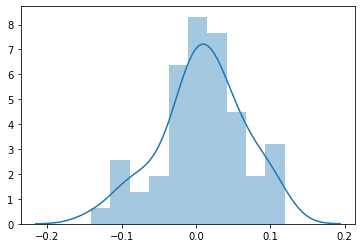

In [147]:
sns.distplot(ycl_test-y_predclexp,bins=10)

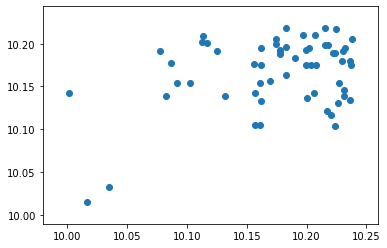

In [172]:
plt.scatter(ycl_test,y_predcl)